# 1. Удачные кластеры

Ваша задача - воспользоваться реализацией алгоритма K-Means из sklearn для кластеризации нескольких синтетических (то есть созданных искусственно) датасетов. Как вы знаете из лекции, у алгоритма k-means есть свои ограничения. Совсем не всегда кластеризация, проведённая при помощи этого алгоритма, оказывается удачной. В случае работы с двумерными данными возможно визуально оценить адекватность проведённой кластеризации. Мы предлагаем вам сделать это и определить, для каких датасетов k-means будет удачным выбором алгоритма кластеризации, а для каких следует воспользоваться другими алгоритмами.

1) Загрузите датасеты по [ссылке](https://drive.google.com/drive/folders/19b-_lmXA_sM-czJr1ONj1VsjBxRecT0e?usp=sharing)

2) Для каждого датасета решите задачу кластеризации при помощи алгоритма k-means из библиотеки sklearn. Для этого можете визуализировать датасеты заранее, чтобы понимать, какое количество кластеров необходимо передать в аргумент n_clusters.

3) Визуализируйте полученное решение, по построенной визуализации определите, смог ли алгоритм решить поставленную задачу. Датасеты подобраны специально таким образом, чтобы у вас не возникло сомнений в результате при условии правильного выполнения всех действий. В случае неясной ситуации, пользуйтесь следующим правилом: считаем, что алгоритм подходит для решения задачи кластеризации, если больше, чем 90% объектов распределены в правильные кластеры. Специально для того, чтобы у вас была возможность проверить этот критерий, в файлах также прописаны номера кластеров.

В качестве ответа к данной задаче укажите номера датасетов, для кластеризации которых может быть использован алгоритм K-Means, в виде одного числа.

Например, если датасеты 1, 2, 5 и 7 могут быть класетризованы алгоритмом K-Means, укажите в ответе число 1257.
Примечания

* Обратите внимание, что метки кластеров от запуска к запуску алгоритма K-Means могут меняться,а также могут случайно не совпасть с метками классов, прописанными в файле, при совпадающем фактическом распределении объектов по кластерам. Этот момент нужно дополнительно учесть при оценке качества

* Напоминание: Загрузку датасетов можно произвести при помощи функции pandas.read_csv. При использовании этой функции не забудьте выставить значение аргумента index_col равным None

* Заголовки таблиц в разных файлах представлены немного в разных форматах и имеют немного разные названия. Первый столбец каждого файла - это координата x, второй - координата y, а третий - метка кластера (в файлах она подписана, как "class")

* Используйте значение random_state = 42

In [1]:
import os

import numpy as np
import pandas as pd

data = []
for dirpath, dirnames, filenames in os.walk('data/Homework 9/'):
    for filename in sorted(filenames):
        batch = pd.read_csv(os.path.join(dirpath, filename), index_col=None, decimal='.', sep=',')
        try:
            batch.columns = ['x', 'y', 'class']
        except:
            batch.columns = ['idx', 'x', 'y', 'class']
            batch = batch[['x', 'y', 'class']]
        batch.index.name = filename
        data.append(batch)

In [2]:
from sklearn.cluster import KMeans

for i, df in enumerate(data):
    n_clusters = df['class'].unique().shape[0]
    clt = KMeans(n_clusters=n_clusters, random_state=42)
    clt.fit(df[['x', 'y']].values)
    data[i]['predict'] = clt.labels_

In [3]:
import matplotlib.pyplot as plt

def plotClasters(data: list) -> None:
    fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12, 24))
    for i, df in enumerate(data):
        df.plot.scatter(x='x', y='y', c='class', colormap='viridis', ax=ax[i, 0], title=f'Test {df.index.name}')
        df.plot.scatter(x='x', y='y', c='predict', colormap='viridis', ax=ax[i, 1], title=f'Train {df.index.name}')
    plt.tight_layout()

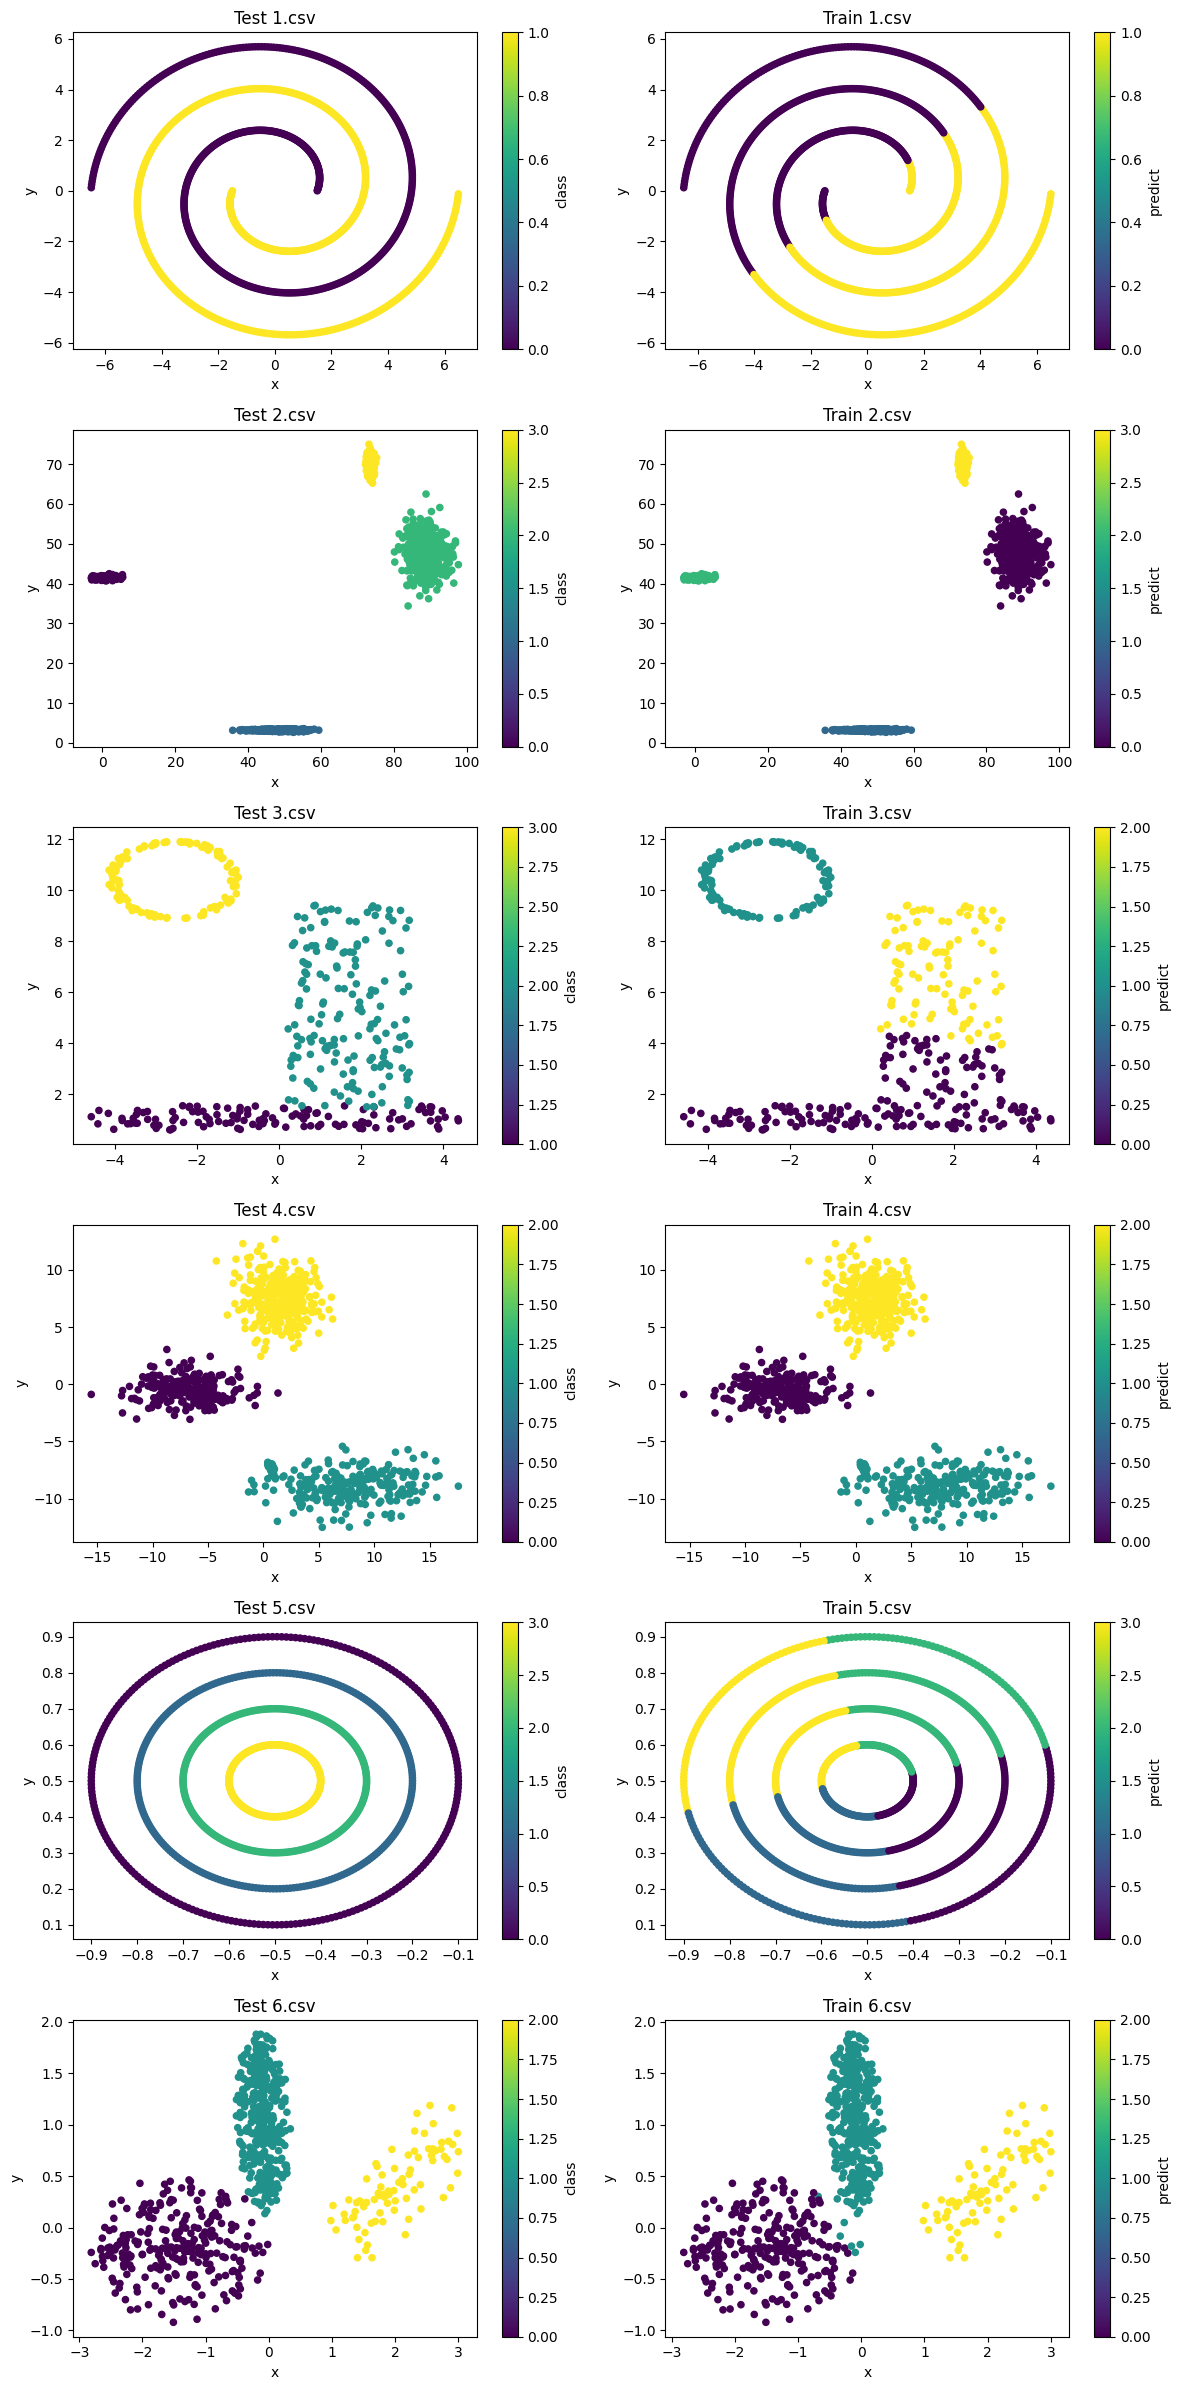

In [4]:
plotClasters(data)

# 2. Алгоритм K-Средних

# 9.2. Алгоритм KMeans

На лекции вам была предложена реализация k-means "руками", без применения библиотечных реализаций. Но эта реализация была предложена исключительно для двумерных векторов. Ваша задача - написать класс `KMeans`, в рамках которого должны быть реализованы следующие функции:

* `.fit(X, n_clusters)` - функция вычисления оптимальных центров кластеров, соответствующих логике алгоритма KMeans
* `.predict(X)` - функция кластеризации объектов из выборки `X`

Конструктор класса `KMeans` должен принимать 2 аргумента:
* `K` - количество кластеров
* `init` - аргумент, принимающий массив размерности $K × M$, где $M$ - размерность векторов признаковых описаний объектов, а $K$ - число кластеров, содержащий координаты исходным приближений центров кластеров

Алгоритм не должен содержать элементов готовых решений из любых библиотек, пользоваться можно только библиотеками `numpy` и `collections`. В качестве метрики используйте обычное [евклидово расстояние](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=9M9zA6jeFDfb).

В качестве критерия останова алгоритма можно использовать следующее утверждение: *алгоритм кластеризации сходится (останавливается), когда изменение центров кластеров на очередной итерации алгоритма незначительно. Т.е. **все попарные расстояния между обновлёнными и предшествующими значениями центров кластеров на очередной итерации не превосходят некоторого маленького числа (в нашем случае рассмотрим 0.001)**.*

В математических терминах это можно записать так. Пусть $\vec{C^i_1}, \vec{C^i_2}, ... \vec{C^i_K}$ - центры кластеров, полученные на итерации алгоритма с номером $i$, а $\vec{C^{i-1}_1}, \vec{C^{i-1}_2}, ... \vec{C^{i-1}_K}$ - центры кластеров, полученные на предыдущей итерации с номером $i-1$. Тогда алгоритм кластеризации завершится после итерации i, если:

$$max\left(||\vec{C^i_1}-\vec{C^{i-1}_1}||, ||\vec{C^i_2}-\vec{C^{i-1}_2}||, ... ||\vec{C^i_K}-\vec{C^{i-1}_K}||\right)\leq0.001$$

In [5]:
import numpy as np
from collections import defaultdict


distance = lambda x, y: np.sqrt(((x - y) ** 2).sum())


class Point(object):
    def __init__(self, features, cluster):
        self.features = np.array(features, dtype=object)
        self.cluster = cluster
        
    def __repr__(self):
        return f'Cluster: {self.cluster}, features: {self.features}'

    def set_cluster(self, cluster):
        self.cluster = cluster

    def get_distance(self, point):
        return distance(self.features, point.features)


class KMeans(object):
    def __init__(self, K, init: np.array):
        self.K = K
        self.centers = [Point(features, cluster) for cluster, features in enumerate(init, 0)]
    
    def __repr__(self):
        return f'K-mean classifier with {self.K} Ks'

    def _set_point_cluster(self, points):
        for point in points:
            distances = [point.get_distance(i) for i in self.centers]
            cluster = np.argmin(distances)
            point.set_cluster(cluster)
        return points
    
    def _get_point_centers(self, points):
        clusters = defaultdict(list)
        for point in points:
            clusters[point.cluster].append(point.features)
        for cluster, _ in enumerate(self.centers, 0):
            self.centers[cluster].features = np.mean(clusters[cluster], axis=0)
    
    def _get_max_iter_distance(self, prev_centers):
        return max(
            distance(temp.features, prev.features) for temp, prev in zip(self.centers, prev_centers)
        )
        
    def fit(self, X):
        delta = 1
        points = [Point(features, 0) for cluster, features in enumerate(X, 0)]
        
        while delta > 1e-3:
            # Save previous centers
            prev_centers = [Point(center.features, cluster) for cluster, center in enumerate(self.centers, 0)]
            
            # Next iteration
            points = self._set_point_cluster(points)
            self._get_point_centers(points)
            
            # Difference b/w previous and new centers
            delta = self._get_max_iter_distance(prev_centers)
            print(delta)
    
    def predict(self, X):
        points = [Point(features, 0) for cluster, features in enumerate(X, 0)]
        points = self._set_point_cluster(points)
        return [point.cluster for point in points]

In [6]:
X = data[0][['x', 'y']].values
init = [[1, 1], [0, 0]]

In [7]:
clt = KMeans(K=2, init=init)
points = [Point(features, 0) for cluster, features in enumerate(X, 0)]

In [8]:
data[0]['predict'] = clt.predict(X)

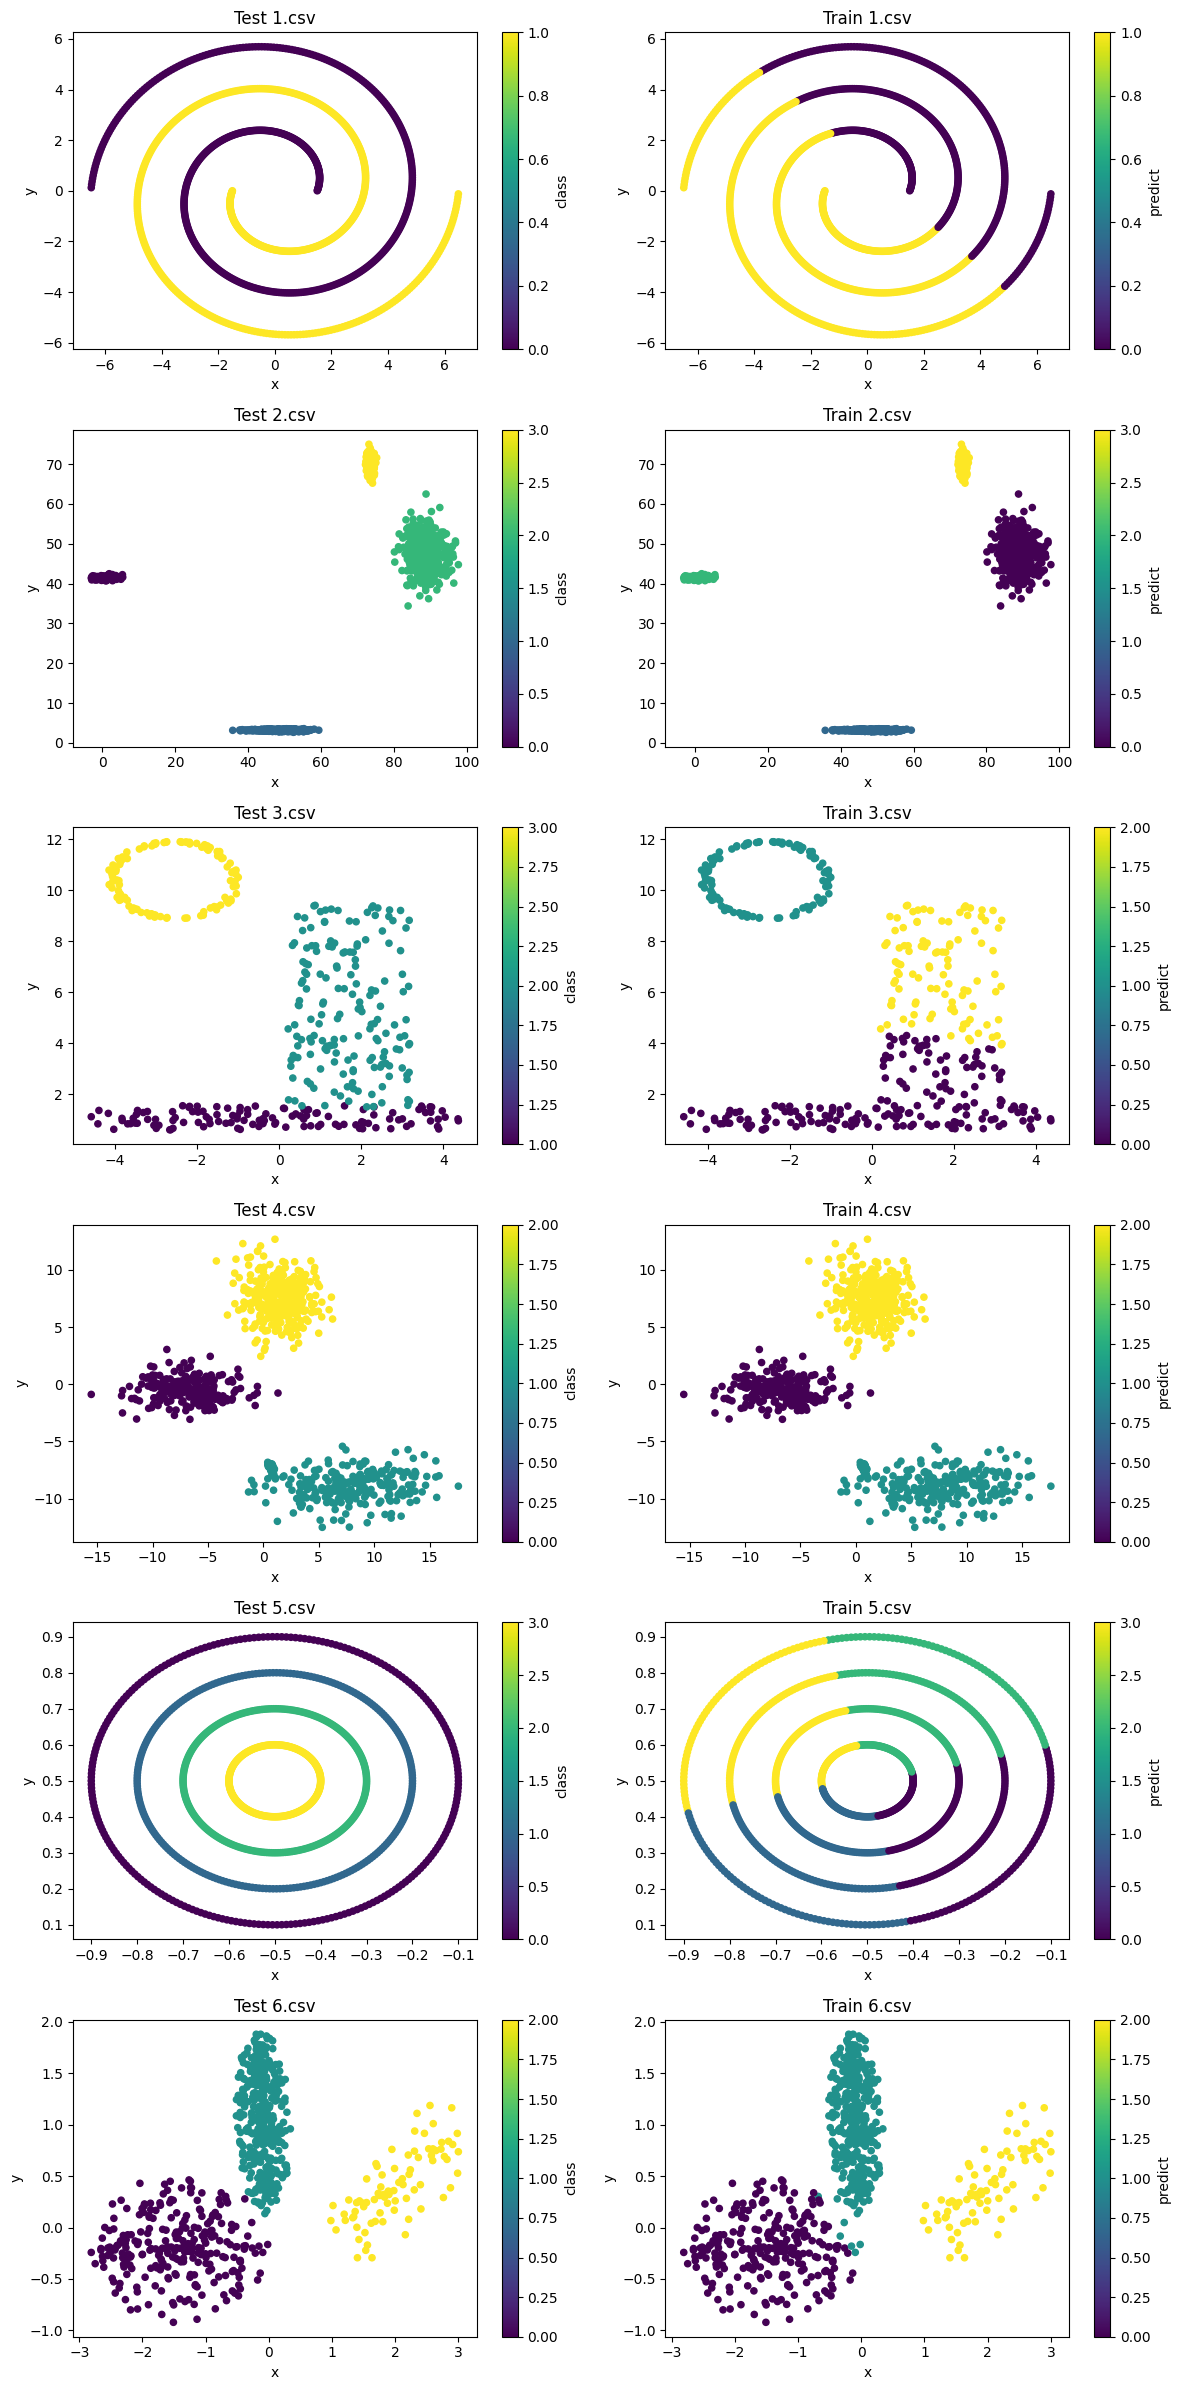

In [9]:
plotClasters(data)